In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bikesharing_data = pd.read_csv('C:/Users/aanand/Desktop/Python-Data/bike_sharing_hourly.csv', index_col = 0)

bikesharing_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [4]:
bikesharing_data[['temp','hum']].describe()

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [6]:
'''Checking if there is a relationship between temperature and humidity'''
bikesharing_data[['temp','hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [7]:
'''Lag here means hours. That means we are corelating temp with the temp 2 hours back and its correlation. The farther the gap is, less there correlation. This can also be looked 
for humidity.'''
bikesharing_data['temp'].autocorr(lag = 2)

0.9806849149013234

In [9]:
bikesharing_data['temp'].autocorr(lag = 12)

0.8250709628213121

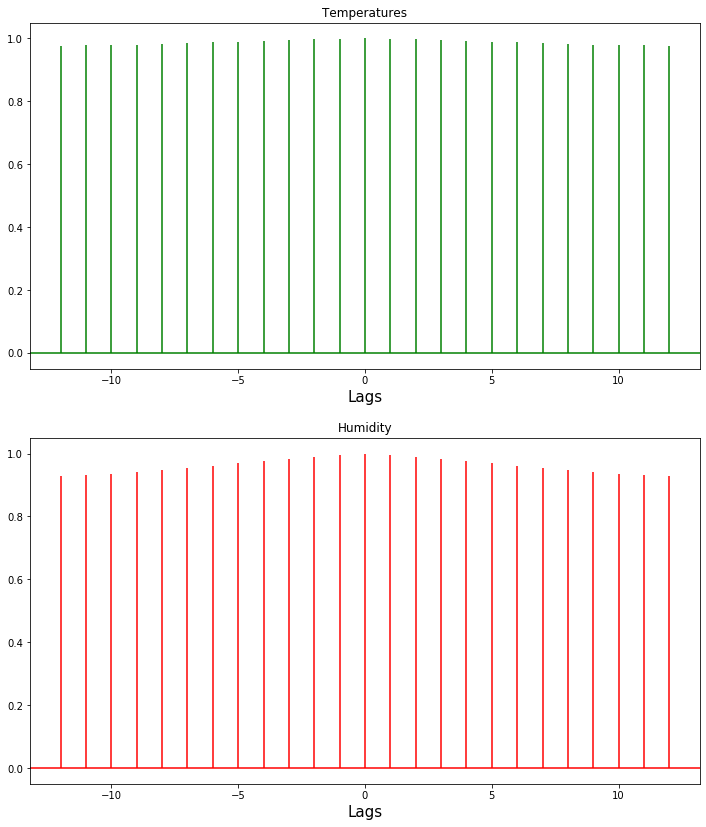

In [13]:
'''The below graphs shows that temperature and humidity are a auto-correlated with themselves to the past hours'''
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,14))

ax1.acorr(bikesharing_data['temp'], 
           maxlags = 12, color = 'green')

ax1.title.set_text('Temperatures')
ax1.set_xlabel('Lags', fontsize = 15)

ax2.acorr(bikesharing_data['hum'],
         maxlags = 12, color = 'red')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 15)

plt.show()

In [15]:
'''The current temperature is correlated yesterday at the same time i.e. 24 hours'''
bikesharing_data['temp'].autocorr(lag = 24)


0.9148730709671984

In [16]:
bikesharing_data['hum'].autocorr(lag = 24)

0.4948813054393593

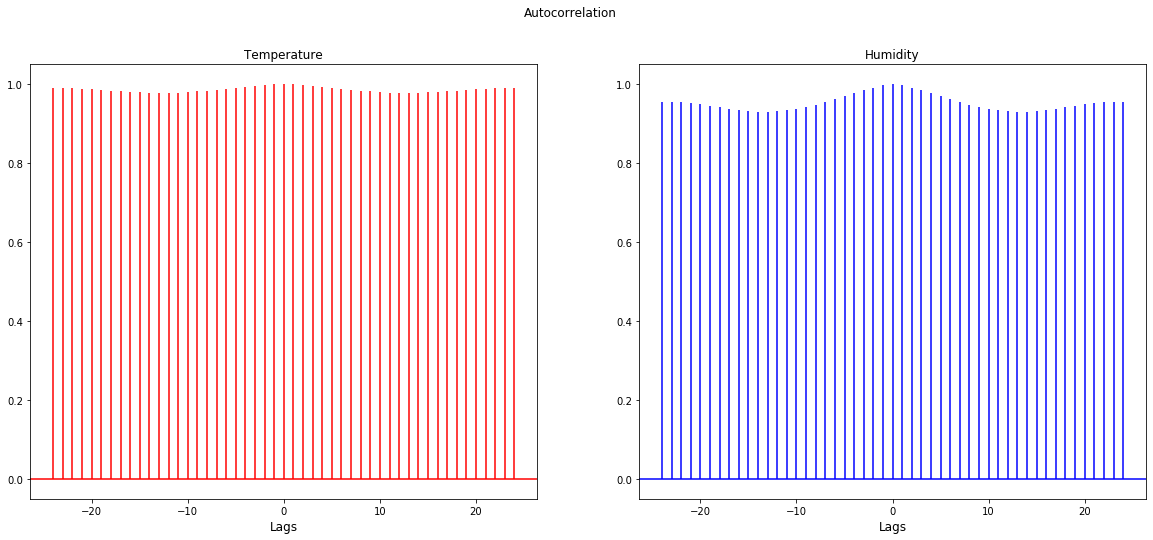

In [20]:
'''The below graphs shows that temperature and humidity are a auto-correlated with themselves to the past hours'''
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

ax1.acorr(bikesharing_data['temp'], 
           maxlags = 24, color = 'red')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize = 12)

ax2.acorr(bikesharing_data['hum'],
         maxlags = 24, color = 'blue')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize = 12)

plt.suptitle('Autocorrelation')

plt.show()